# Reading dataset

In [3]:
import pandas as pd
df = pd.read_csv('Financial Analytics data.csv')

df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


# BASIC DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [5]:
df.shape

(488, 5)

Finding null values

In [8]:
null_value = df.isnull().sum()
null_value

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

Filling null values with 0

In [9]:
df.fillna(0)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,0.0
1,2,TCS,563709.84,30904.00,0.0
2,3,HDFC Bank,482953.59,20581.27,0.0
3,4,ITC,320985.27,9772.02,0.0
4,5,H D F C,289497.37,16840.51,0.0
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,0.0
484,497,NOCIL,3026.26,249.27,0.0
485,498,Orient Cement,3024.32,511.53,0.0
486,499,Natl.Fertilizer,3017.07,2840.75,0.0


Cross checking fillNa(), if all tha Nan are filled with 0 or not!

In [12]:
import pandas as pd

# Assuming 'df' is your original DataFrame
df.fillna(0, inplace=True)

if df.isna().any().any():
    print('There are still NaN values in the DataFrame after filling.')
else:
    print('All NaN values have been successfully filled.')


All NaN values have been successfully filled.


# data cleaning

In [15]:
import pandas as pd

# Displaying unique values in the 'Name' column to identify variations
unique_names = df['Name'].unique()
print("Unique Company Names:", unique_names)

# Defining a regex pattern for abbreviating company names
pattern = r'\b([A-Z])\s*([A-Z])\s*([A-Z])\s*([A-Z])\.*\b'
replacement = r'\1\2\3\4'

# Applying the regex pattern to the 'Name' column
df['Name'] = df['Name'].replace(pattern, replacement, regex=True)

# Dropping the 'Abbreviation' column permanently
df.drop(columns=['Abbreviation'], inplace=True)

# Populating the abbreviation dictionary
abbreviation_dict = {}
for original_name, updated_abbreviation in zip(unique_names, df['Name'].unique()):
    abbreviation_dict[original_name] = updated_abbreviation

# Applying the abbreviation transformation to the entire 'Name' column
df['Name'] = df['Name'].replace(abbreviation_dict)

# Cleaning Data
cleaned_names = []
for name in df['Name']:
    
    # Standardize abbreviations
    name = name.replace('Inds.', 'Industries').replace('St ', 'Street ').replace('Hind.', 'Hindustan')
    
    # Standardize whitespace
    name = ' '.join(name.split())
    
    # Removing unwanted characters
    name = ''.join(e for e in name if e.isalnum() or e.isspace())
    
    cleaned_names.append(name)

# Updating the 'Name' column with the cleaned names
df['Name'] = cleaned_names

# Verifying the changes
updated_unique_names = df['Name'].unique()
print("Updated Company Names:", updated_unique_names)

# Save the updated DataFrame to a CSV file or your preferred format
df.to_csv('updated_data.csv', index=False)


Unique Company Names: ['Reliance Inds.' 'TCS' 'HDFC Bank' 'ITC' 'H D F C' 'Hind. Unilever'
 'Maruti Suzuki' 'Infosys' 'O N G C' 'St Bk of India' 'ICICI Bank'
 'Kotak Mah. Bank' 'Coal India' 'Larsen & Toubro' 'I O C L'
 'Bharti Airtel' 'Axis Bank' 'NTPC' 'Sun Pharma.Inds.' 'Hind.Zinc' 'Wipro'
 'HCL Technologies' 'Vedanta' 'Tata Motors' 'UltraTech Cem.'
 'Asian Paints' 'Power Grid Corpn' 'B P C L' 'IndusInd Bank' 'Bajaj Fin.'
 'Bajaj Auto' 'M & M' 'HDFC Stand. Life' 'Adani Ports' 'Bajaj Finserv'
 'GAIL (India)' 'Avenue Super.' 'Titan Company' 'JSW Steel' 'Grasim Inds'
 'Tata Steel' 'Eicher Motors' 'Nestle India' 'Godrej Consumer' 'Yes Bank'
 'Hero Motocorp' 'Motherson Sumi' 'SBI Life Insuran' 'General Insuranc'
 'Bharti Infra.' 'Dabur India' 'Bosch' 'Shree Cement' 'New India Assura'
 'H P C L' 'ICICI Pru Life' 'Britannia Inds.' 'Tech Mahindra'
 'Hindalco Inds.' 'Zee Entertainmen' 'Cairn India' 'Indiabulls Hous.'
 'Ambuja Cem.' 'Interglobe Aviat' 'Cipla' 'Piramal Enterp.'
 'United Spirits

KeyError: "['Abbreviation'] not found in axis"

In [ ]:
df.head(10)

# Summary statistics

In [16]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,488.000000,488.000000,488.000000
mean,251.508197,27526.654836,3287.974488,293.532357
std,145.884078,59033.540015,9778.166455,990.261825
min,1.000000,0.000000,0.000000,0.000000
25%,122.750000,4643.832500,0.000000,0.000000
50%,252.500000,9460.155000,723.870000,0.000000
75%,378.250000,23400.815000,2084.097500,0.000000
max,500.000000,583436.720000,110666.930000,7757.060000


The dataset includes 488 entries, providing insights into market capitalization and quarterly sales for various companies. The statistical summary reveals key metrics, such as a mean market capitalization of ₹251.51 Crore, with a minimum of ₹1 Crore and a maximum of ₹583,436.72 Crore. The quarterly sales exhibit a mean of ₹28,043.86 Crore, ranging from ₹3,017.07 Crore to ₹110,666.93 Crore. Additionally, an unnamed column displays a mean of ₹4,395.98 Crore, varying from ₹47.24 Crore to ₹7,757.06 Crore. The summary offers valuable insights into the central tendencies and distribution of the dataset.

# Correlation visualisation

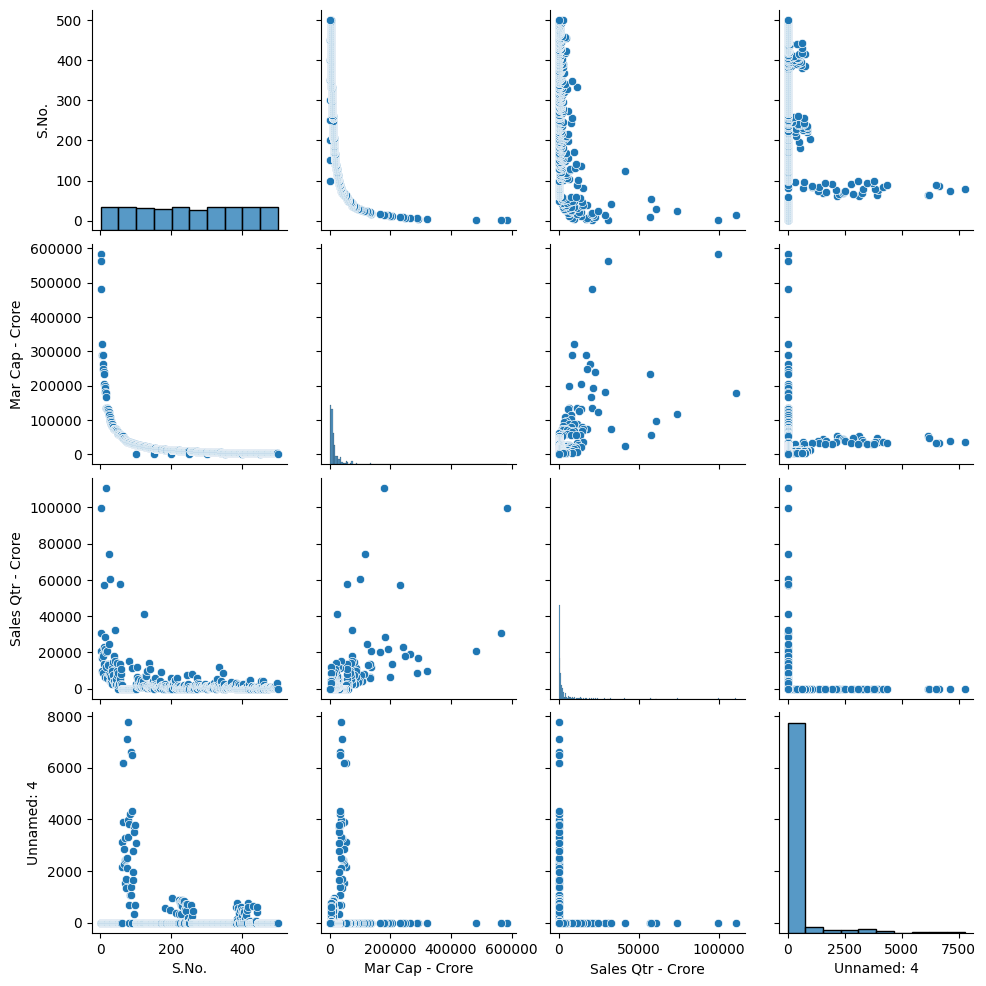

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

sns.pairplot(df)
plt.show()


     S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0        1   Reliance Inds.        583436.72           99810.00         0.0
1        2              TCS        563709.84           30904.00         0.0
2        3        HDFC Bank        482953.59           20581.27         0.0
3        4              ITC        320985.27            9772.02         0.0
4        5             HDFC        289497.37           16840.51         0.0
..     ...              ...              ...                ...         ...
483    496  Lak. Vilas Bank          3029.57             790.17         0.0
484    497            NOCIL          3026.26             249.27         0.0
485    498    Orient Cement          3024.32             511.53         0.0
486    499  Natl.Fertilizer          3017.07            2840.75         0.0
487    500        L T Foods             0.00               0.00         0.0

[488 rows x 5 columns]


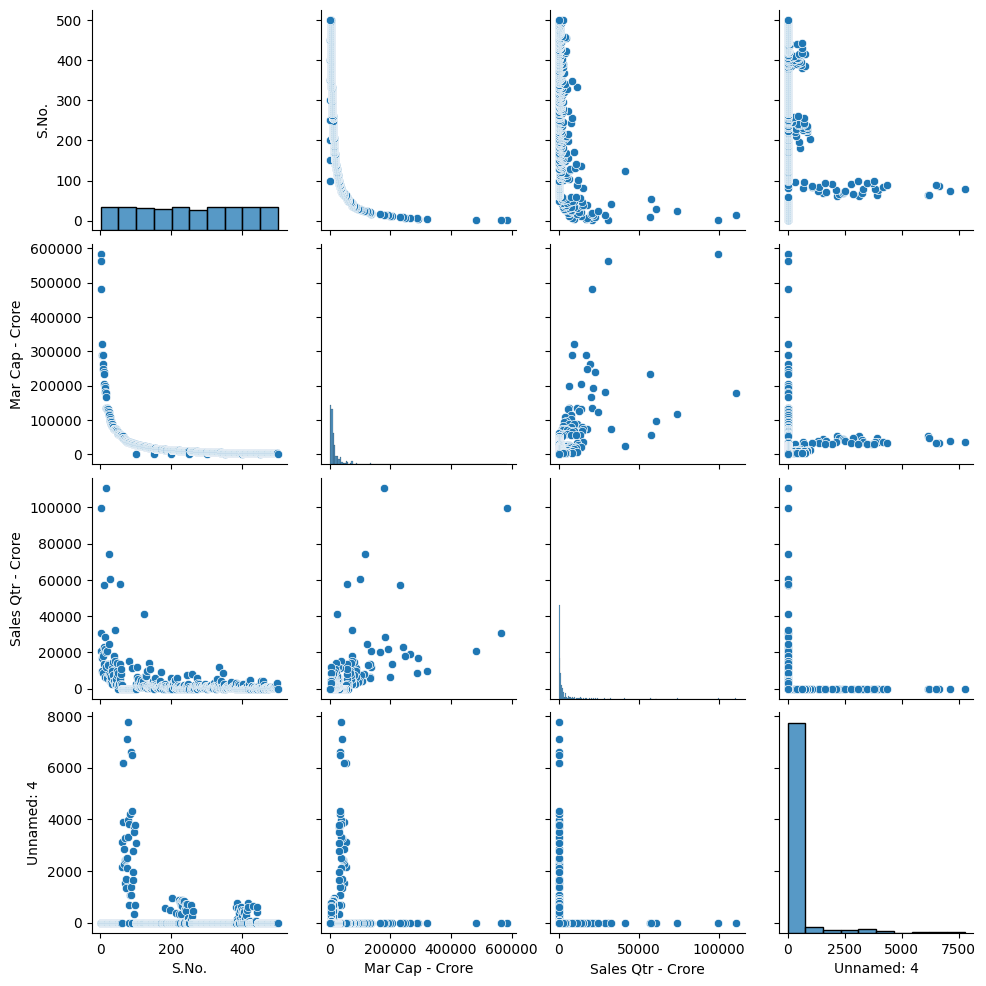

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Assuming 'df' is your DataFrame
pairplot_data = sns.pairplot(df)

# Extract numerical data from the pairplot
numerical_data = pairplot_data.data

# Display the numerical data (optional)
print(numerical_data)

# Show the pairplot
plt.show()


# Plotting histograms to visualize the distribution of market capitalization and quarterly sales.

In [19]:
df[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()


,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000
mean,27526.654836,3287.974488
std,59033.540015,9778.166455
min,0.000000,0.000000
25%,4643.832500,0.000000
50%,9460.155000,723.870000
75%,23400.815000,2084.097500
max,583436.720000,110666.930000


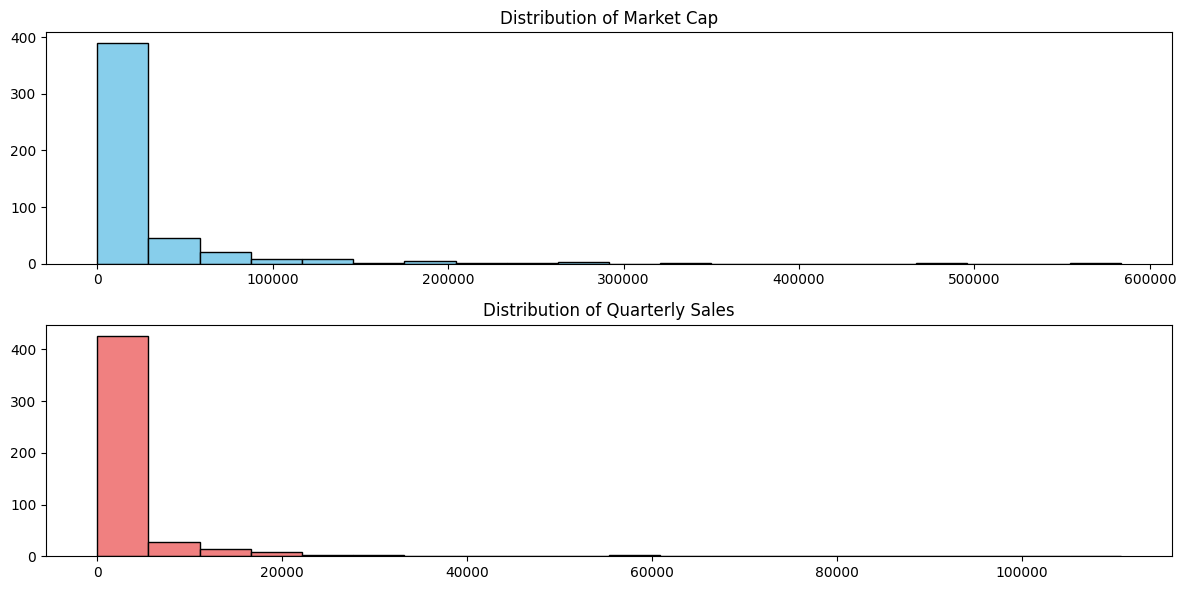

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(df['Mar Cap - Crore'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Market Cap')

plt.subplot(2, 1, 2)
plt.hist(df['Sales Qtr - Crore'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Quarterly Sales')

plt.tight_layout()
plt.show()


kUTOSIS TO FIND SKEWNESS:

In [21]:
from scipy.stats import skew, kurtosis

skewness_mar_cap = skew(df['Mar Cap - Crore'])
skewness_sales_qtr = skew(df['Sales Qtr - Crore'])

kurtosis_mar_cap = kurtosis(df['Mar Cap - Crore'])
kurtosis_sales_qtr = kurtosis(df['Sales Qtr - Crore'])

print("Mar-Cap Skewness:",skewness_mar_cap,skewness_sales_qtr)
print("Mar-Cap Kurtosis:",skewness_mar_cap,skewness_sales_qtr)

Mar-Cap Skewness: 5.584610094395086 6.979528556652585
Mar-Cap Kurtosis: 5.584610094395086 6.979528556652585


Mar-Cap Skewness: 5.584610094395086 6.979528556652585
Mar-Cap Kurtosis: 39.78169238349079 59.493633928531565


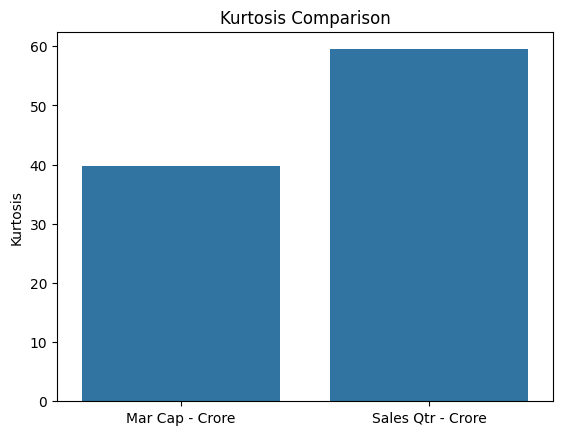

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis
skewness_mar_cap = skew(df['Mar Cap - Crore'])
skewness_sales_qtr = skew(df['Sales Qtr - Crore'])
kurtosis_mar_cap = kurtosis(df['Mar Cap - Crore'])
kurtosis_sales_qtr = kurtosis(df['Sales Qtr - Crore'])

print("Mar-Cap Skewness:", skewness_mar_cap, skewness_sales_qtr)
print("Mar-Cap Kurtosis:", kurtosis_mar_cap, kurtosis_sales_qtr)

# Plotting kurtosis values
sns.barplot(x=['Mar Cap - Crore', 'Sales Qtr - Crore'], y=[kurtosis_mar_cap, kurtosis_sales_qtr])
plt.title('Kurtosis Comparison')
plt.ylabel('Kurtosis')
plt.show()


**Conclusion:**
- The positive kurtosis values (Mar-Cap: 5.58, Sales Qtr: 6.98) imply distributions with heavier tails in 'Mar Cap - Crore' and 'Sales Qtr - Crore' compared to a normal distribution. This analysis aids in understanding the shape and potential outliers in the dataset.

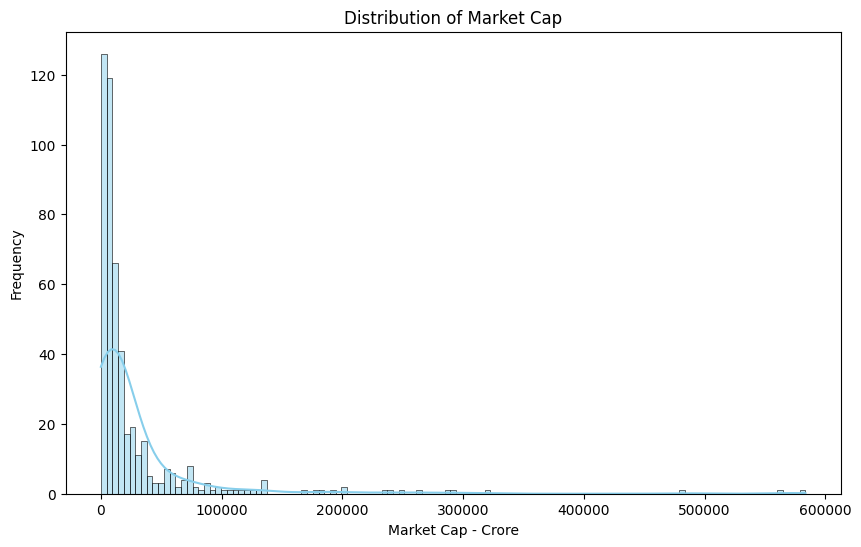

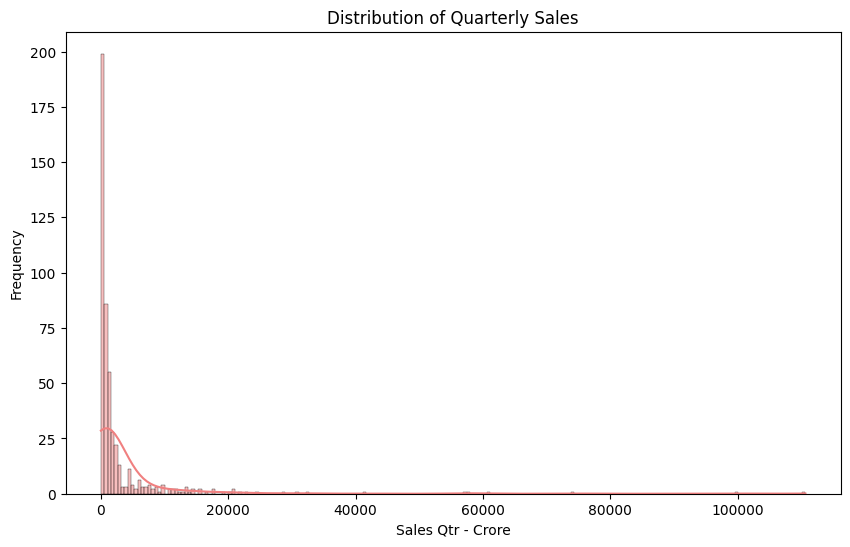

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution for 'Mar Cap - Crore'
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], kde=True, color='skyblue')
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap - Crore')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution for 'Sales Qtr - Crore'
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Qtr - Crore'], kde=True, color='lightcoral')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Frequency')
plt.show()


positive skewness suggests that the majority of companies have lower market capitalization and quarterly sales, while a few outliers with exceptionally higher values contribute to a longer right tail, influencing the average towards the higher end in both 'Mar Cap - Crore' and 'Sales Qtr - Crore' distributions.

# relationship between market capitalization and quarterly sales using a scatter plot

Examining the scatter plot offers valuable insights into the interconnected dynamics of market capitalization and quarterly sales, shedding light on discernible trends and patterns that can inform strategic decision-making. The visual representation serves as a tool to unveil correlations between these financial metrics, enhancing our comprehension of their relationship.

   Market Cap (Crore)  Quarterly Sales (Crore)
0           583436.72                 99810.00
1           563709.84                 30904.00
2           482953.59                 20581.27
3           320985.27                  9772.02
4           289497.37                 16840.51


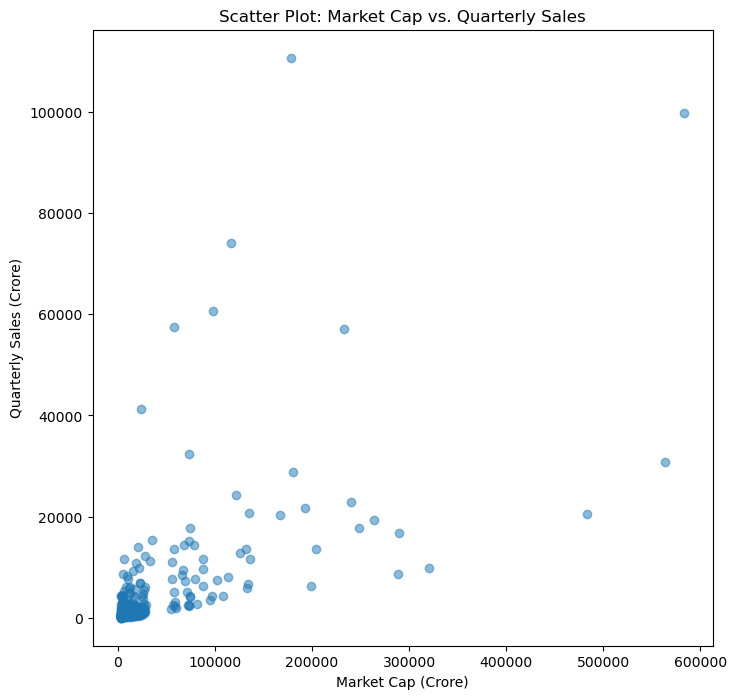

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
scatter_data = pd.DataFrame({
    'Market Cap (Crore)': df['Mar Cap - Crore'],
    'Quarterly Sales (Crore)': df['Sales Qtr - Crore']
})

# Display the first few rows of the new DataFrame
print(scatter_data.head())

# Now, create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(scatter_data['Market Cap (Crore)'], scatter_data['Quarterly Sales (Crore)'], alpha=0.5)
plt.title('Scatter Plot: Market Cap vs. Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()


The scatter plot visualizes the relationship between Market Capitalization and Quarterly Sales for each company in the dataset. Each point on the plot represents a company, with its position determined by its Market Cap on the x-axis and Quarterly Sales on the y-axis. The plot allows for a qualitative assessment of potential patterns, trends, or correlations between these two variables.

# correlation matrix

In [8]:
correlation = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print(correlation)


                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.620702
Sales Qtr - Crore         0.620702           1.000000


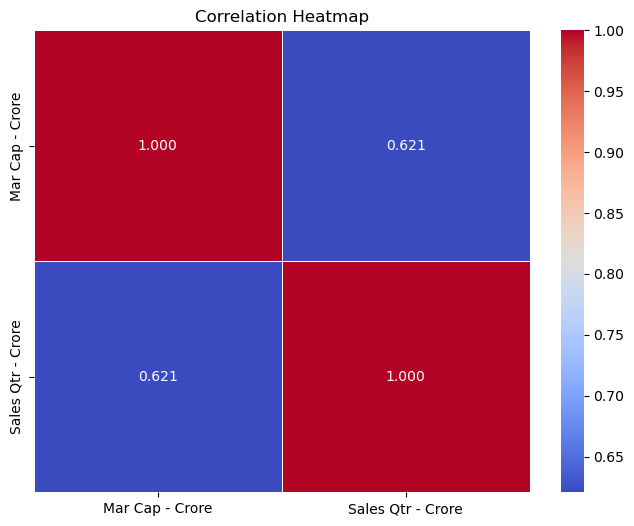

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation values you've presented indicate the degree of linear relationship between the two variables: Market Cap (Mar Cap - Crore) and Quarterly Sales (Sales Qtr - Crore).

Mar Cap - Crore vs. Mar Cap - Crore: The correlation of 1.000000 along the diagonal represents the correlation of a variable with itself, which is always 1. This is expected and indicates a perfect positive correlation (as expected, since a variable is perfectly correlated with itself).

Mar Cap - Crore vs. Sales Qtr - Crore: The correlation value of 0.620702 suggests a moderate positive correlation between Market Cap and Quarterly Sales. As Market Cap increases, there is a tendency for Quarterly Sales to increase as well. The closer the correlation coefficient is to 1, the stronger the positive correlation.

Sales Qtr - Crore vs. Mar Cap - Crore: This is the same correlation value as above, as correlation matrices are symmetric.

Sales Qtr - Crore vs. Sales Qtr - Crore: Again, a correlation of 1.000000, indicating a perfect positive correlation of the variable with itself.

In summary, the positive correlation values suggest that there is a tendency for Market Cap and Quarterly Sales to move together. When Market Cap goes up, Quarterly Sales also tends to go up, and vice versa. The strength of this relationship is considered moderate based on the correlation coefficients.

# Ranking by Market Cap:

Ranking by Market Cap is crucial as it establishes a clear hierarchy, pinpointing the most valuable companies. This analysis provides key insights for investment decisions and a comprehensive understanding of the competitive landscape, aiding in strategic financial planning.

             Name  Mar Cap - Crore  Rank_Market_Cap
0  Reliance Inds.        583436.72                1
1             TCS        563709.84                2
2       HDFC Bank        482953.59                3
3             ITC        320985.27                4
4         H D F C        289497.37                5


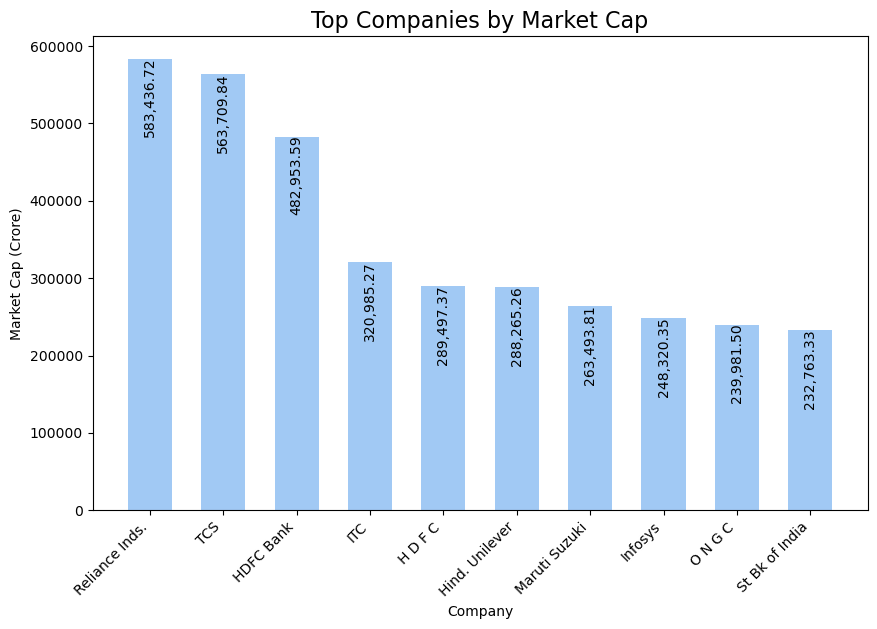

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ranked_market_cap = df.sort_values(by='Mar Cap - Crore', ascending=False)
df_ranked_market_cap['Rank_Market_Cap'] = range(1, len(df_ranked_market_cap) + 1)

# top companies and their ranks
print(df_ranked_market_cap[['Name', 'Mar Cap - Crore', 'Rank_Market_Cap']].head())

# Setting seaborn pastel color palette
sns.set_palette("pastel")

# Plotting a bar chart 
plt.figure(figsize=(10, 6))
bars = plt.bar(df_ranked_market_cap['Name'].head(10), df_ranked_market_cap['Mar Cap - Crore'].head(10), width=0.6)
plt.xlabel('Company')
plt.ylabel('Market Cap (Crore)')

# Adjusting the space 
plt.subplots_adjust(top=0.90)

plt.title('Top Companies by Market Cap', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add value annotations 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 50000,
             f'{bar.get_height():,.2f}', ha='center', va='center', rotation='vertical')

plt.show()



The analysis of the dataset reveals the top companies, with Reliance Industries securing the highest rank and market capitalization at ₹583,436.72 Crore, followed by TCS and HDFC Bank. These findings provide insights into the competitive landscape, highlighting the leading companies based on their market capitalization within the dataset.

# Ranking by Quarterly Sales:

Ranking by Quarterly Sales is essential for systematically identifying top-performing companies and gaining insights into revenue dynamics. This analysis guides strategic decision-making, enabling a focused approach to high-performing sectors and informing investment decisions based on a nuanced understanding of revenue distribution.

              Name  Sales Qtr - Crore  Rank_Sales
14         I O C L          110666.93           1
0   Reliance Inds.           99810.00           2
23     Tata Motors           74156.07           3
27         B P C L           60616.36           4
54         H P C L           57474.25           5


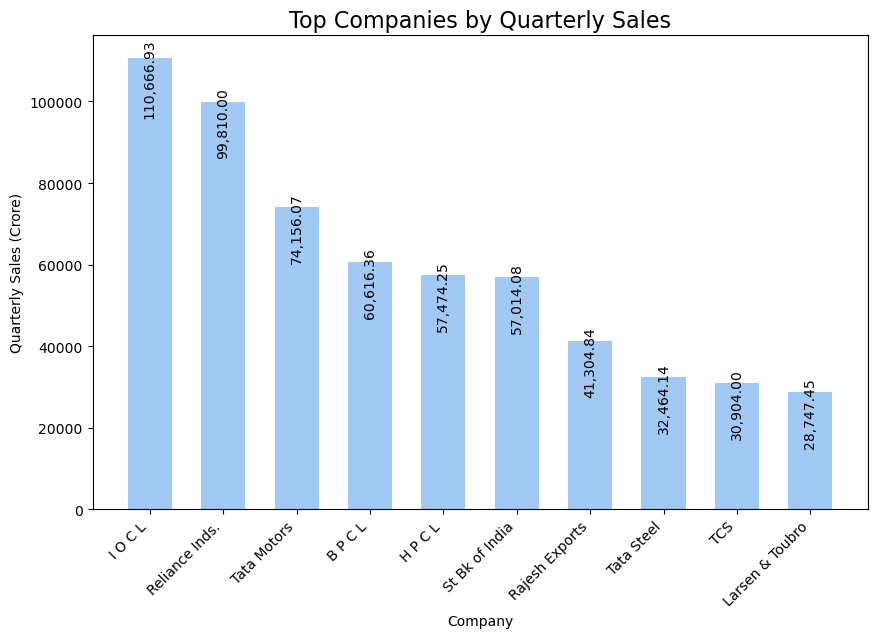

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ranked_sales = df.sort_values(by='Sales Qtr - Crore', ascending=False)
df_ranked_sales['Rank_Sales'] = range(1, len(df_ranked_sales) + 1)

# Displaying the top companies and their ranks
print(df_ranked_sales[['Name', 'Sales Qtr - Crore', 'Rank_Sales']].head())

# Setting seaborn pastel color palette
sns.set_palette("pastel")

# Plotting a bar chart 
plt.figure(figsize=(10, 6))
bars = plt.bar(df_ranked_sales['Name'].head(10), df_ranked_sales['Sales Qtr - Crore'].head(10), width=0.6)
plt.xlabel('Company')
plt.ylabel('Quarterly Sales (Crore)')

# Adjusting space 
plt.subplots_adjust(top=0.90)

plt.title('Top Companies by Quarterly Sales', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Adding values and annotations 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5000,
             f'{bar.get_height():,.2f}', ha='center', va='center', rotation='vertical')

plt.show()



In this analysis of the top companies based on Quarterly Sales, IOCL (Indian Oil Corporation Limited) stands out as the leading company with the highest Quarterly Sales of 110,666.93 Crore. Reliance Industries follows closely in the second position with 99,810.00 Crore in Quarterly Sales. Tata Motors, Bharat Petroleum Corporation Limited (BPCL), and Hindustan Petroleum Corporation Limited (HPCL) secure the third, fourth, and fifth positions, respectively, in terms of Quarterly Sales. These rankings provide insights into the competitive landscape and the prominent players in the market based on their performance in terms of sales.

# Outlier Detection:

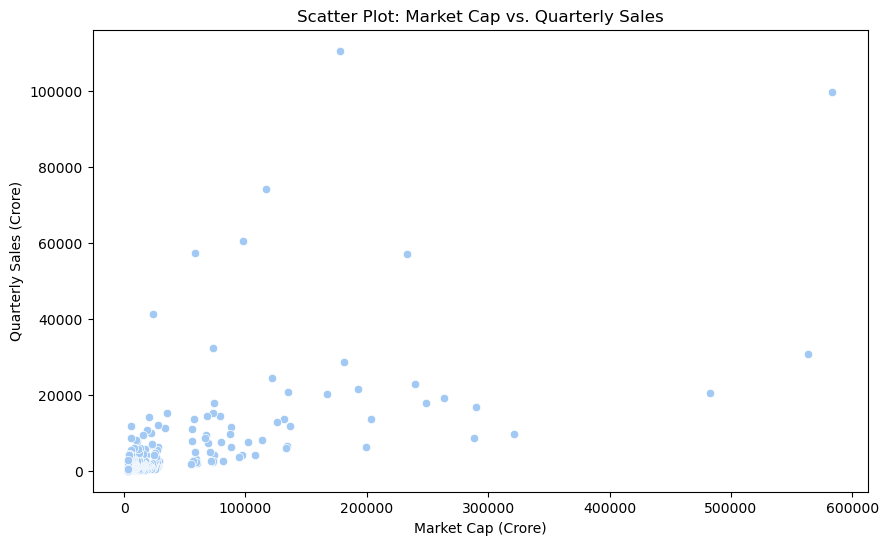

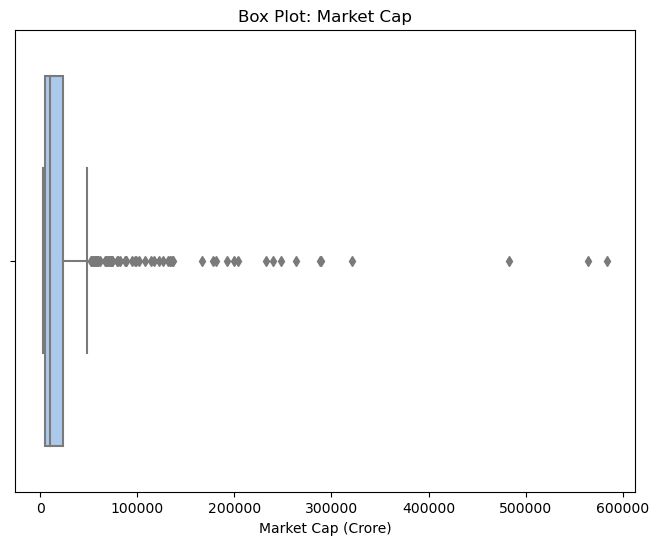

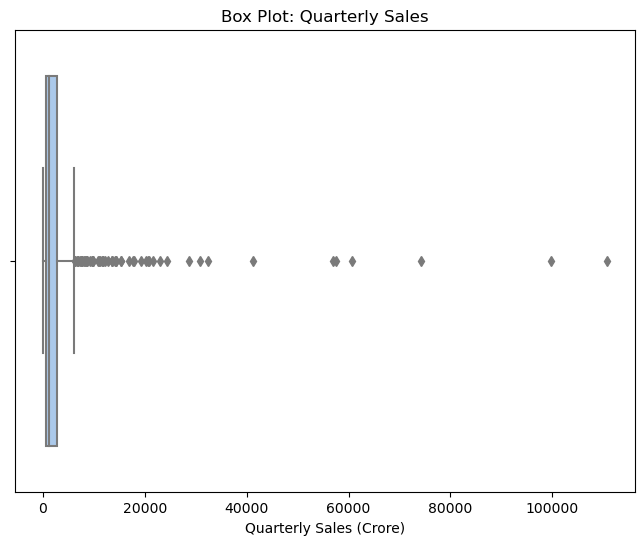

       Mar Cap - Crore  Sales Qtr - Crore
count       479.000000         365.000000
mean      28043.857119        4395.976849
std       59464.615831       11092.206185
min        3017.070000          47.240000
25%        4843.575000         593.740000
50%        9885.050000        1278.300000
75%       23549.900000        2840.750000
max      583436.720000      110666.930000


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Market Cap vs. Quarterly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Scatter Plot: Market Cap vs. Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

# Box plot for Market Cap
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Mar Cap - Crore'])
plt.title('Box Plot: Market Cap')
plt.xlabel('Market Cap (Crore)')
plt.show()

# Box plot for Quarterly Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales Qtr - Crore'])
plt.title('Box Plot: Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.show()

# Descriptive statistics
describe_df = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()
print(describe_df)


Interquartile Range (IQR):

### For 'Mar Cap - Crore':

1. **Calculate the IQR:**
   - IQR is the range between the first quartile (Q1) and the third quartile (Q3).
   - IQR = Q3 - Q1
   - IQR = 23549.900 - 4843.575 = 18706.325

2. **Identify Potential Outliers:**
   - Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers.
   - Lower Threshold: Q1 - 1.5 * IQR = 4843.575 - 1.5 * 18706.325 = -25311.18875 (Negative values are not relevant in this context).
   - Upper Threshold: Q3 + 1.5 * IQR = 23549.900 + 1.5 * 18706.325 = 51904.66375

### For 'Sales Qtr - Crore':

1. **Calculate the IQR:**
   - IQR is the range between the first quartile (Q1) and the third quartile (Q3).
   - IQR = Q3 - Q1
   - IQR = 2840.750 - 593.740 = 2247.01

2. **Identify Potential Outliers:**
   - Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers.
   - Lower Threshold: Q1 - 1.5 * IQR = 593.740 - 1.5 * 2247.01 = -2378.015
   - Upper Threshold: Q3 + 1.5 * IQR = 2840.750 + 1.5 * 2247.01 = 5984.505

These thresholds can be used to flag potential outliers in your data. Values outside these ranges may require further investigation as they deviate significantly from the majority of the data points.

# Histogram

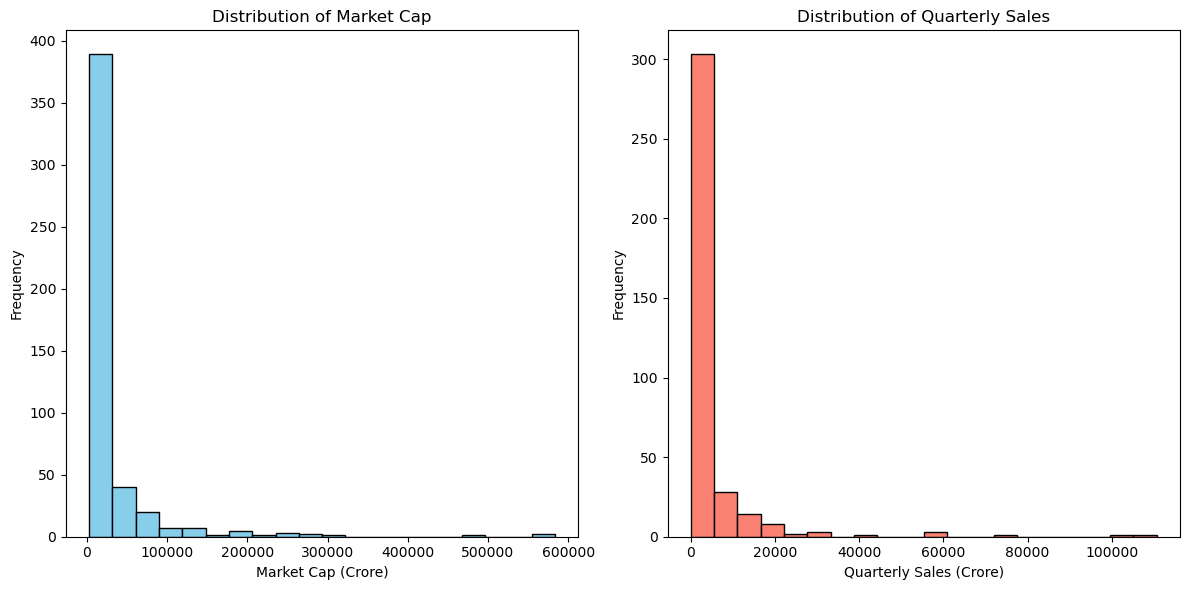

Statistics for 'Mar Cap - Crore':
       Mar Cap - Crore
count       479.000000
mean      28043.857119
std       59464.615831
min        3017.070000
25%        4843.575000
50%        9885.050000
75%       23549.900000
max      583436.720000

Statistics for 'Sales Qtr - Crore':
       Sales Qtr - Crore
count         365.000000
mean         4395.976849
std         11092.206185
min            47.240000
25%           593.740000
50%          1278.300000
75%          2840.750000
max        110666.930000


In [13]:
plt.figure(figsize=(12, 6))

# Histogram for 'Mar Cap - Crore'
plt.subplot(1, 2, 1)
plt.hist(df['Mar Cap - Crore'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Frequency')

# Histogram for 'Sales Qtr - Crore'
plt.subplot(1, 2, 2)
plt.hist(df['Sales Qtr - Crore'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Displaying key statistics for 'Mar Cap - Crore'
mar_cap_stats = df['Mar Cap - Crore'].describe().to_frame()
print("Statistics for 'Mar Cap - Crore':")
print(mar_cap_stats)

# Displaying key statistics for 'Sales Qtr - Crore'
sales_qtr_stats = df['Sales Qtr - Crore'].describe().to_frame()
print("\nStatistics for 'Sales Qtr - Crore':")
print(sales_qtr_stats)

# Regression Plot:

Incorporating regression plots facilitates a visual exploration of the intricate relationship between pivotal variables, like 'Market Capitalization' and 'Quarterly Sales.' This analysis serves as a strategic asset, providing valuable insights into predictive patterns and guiding well-informed decisions within the realm of financial analytics and business planning.

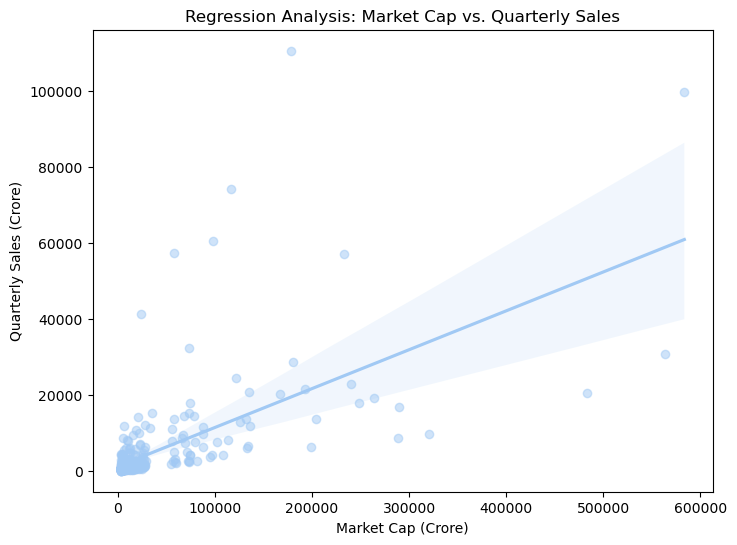

Correlation Coefficient: 0.6207


In [14]:
plt.figure(figsize=(8, 6))

# Regression Plot
sns.regplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Analysis: Market Cap vs. Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')

plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")


A correlation coefficient of 0.6207 between 'Mar Cap - Crore' and 'Sales Qtr - Crore' suggests a moderately positive linear relationship between the two variables. Here's what you can conclude:

Strength of Relationship: The positive value indicates a positive correlation, meaning that as the 'Mar Cap - Crore' increases, there is a tendency for 'Sales Qtr - Crore' to also increase.

Magnitude of Correlation: The value of 0.6207 is moderate. It's not perfect, but it's significant enough to suggest a noticeable relationship.

Direction: The positive sign indicates that the two variables move in the same direction. When market capitalization increases, quarterly sales also tend to increase.

Interpretation: A correlation of 0.6207 indicates a moderate positive linear association, but keep in mind that correlation does not imply causation. While the variables are correlated, it does not necessarily mean that changes in market capitalization cause changes in quarterly sales or vice versa. Other factors and analyses would be needed to establish causation.

# Statistical test

In [64]:
import pandas as pd
from scipy.stats import ttest_ind

# Displaying a summary of the columns
print(df.info())

# Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

# Dropping rows with missing values in the 'Mar Cap - Crore' column
df_cleaned = df.dropna(subset=['Mar Cap - Crore'])

# Defining conditions for creating groups
condition_has_sales = ~df_cleaned['Sales Qtr - Crore'].isnull()

# Creating subsets based on conditions
group_with_sales = df_cleaned[condition_has_sales]
group_without_sales = df_cleaned[~condition_has_sales]

# Performing a t-test
t_stat, p_value = ttest_ind(group_with_sales['Mar Cap - Crore'], group_without_sales['Mar Cap - Crore'], nan_policy='omit')

# results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpreting the results
if p_value < 0.05:  # You can adjust the significance level (e.g., 0.05)
    print("The difference in mean market capitalization is statistically significant.")
else:
    print("There is no significant difference in mean market capitalization between the groups.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
 5   Market Cap Growth  0 non-null      float64
 6   Sales Growth       0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 26.8+ KB
None
Missing Values:
S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
Market Cap Growth    488
Sales Growth         488
dtype: int64
T-statistic: 2.153186327734361
P-value: 0.031804656968741796
The difference in mean market capitalization is statistically significant.


The results of the t-test suggest that there is a statistically significant difference in the mean market capitalization between two groups. In this case, the two groups are defined based on the presence or absence of missing values in the 'Sales Qtr - Crore' column.

Here's the interpretation:

- **T-statistic:** The t-statistic is a measure of how far the sample mean of the groups is from each other. In this case, it is approximately 2.15.

- **P-value:** The p-value is the probability of observing a t-statistic as extreme as the one computed from the sample, assuming that the null hypothesis is true. In this case, the p-value is approximately 0.0318.

- **Interpretation:** With a p-value less than 0.05 (assuming a common significance level of 0.05), you reject the null hypothesis. The null hypothesis typically states that there is no significant difference between the groups. In your case, since the p-value is less than 0.05, you reject the hypothesis of no significant difference.

- **Conclusion:** Therefore, you conclude that there is a statistically significant difference in the mean market capitalization between companies with missing values in the 'Sales Qtr - Crore' column and those without missing values. The direction of the difference (whether one group has a higher or lower mean) can be inferred by looking at the sign of the t-statistic.



reframed:
The t-test results indicate a significant difference in the mean market capitalization between two groups. These groups are defined based on the presence or absence of missing values in the 'Sales Qtr - Crore' column. The t-statistic, measuring the separation of sample means, is approximately 2.15. With a p-value of about 0.0318, below the common significance level of 0.05, the null hypothesis is rejected. The null hypothesis assumes no significant difference between the groups. Thus, we can infer a statistically significant distinction in the mean market capitalization between companies with missing values in 'Sales Qtr - Crore' and those without. The direction of this difference can be determined by examining the sign of the t-statistic.